In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tsp_ga import genetic_algorithm
import numpy as np

In [18]:
# read locations
df = pd.read_csv('ucsd_locations.csv')
locations = list(zip(df['lat'], df['lon']))

In [19]:
# run genetic algorithm
path = genetic_algorithm(locations)

In [20]:
# Define the total_distance function first
def total_distance(path, locations):
    total = 0
    for i in range(len(path) - 1):
        # Calculate distance between consecutive points
        lat1, lon1 = locations[path[i]]
        lat2, lon2 = locations[path[i+1]]
        # Simple Euclidean distance (for demonstration)
        dist = ((lat2 - lat1)**2 + (lon2 - lon1)**2)**0.5
        total += dist
    return total

# Calculate and print total path length
total_dist = total_distance(path, locations) * 111  # Approximate conversion to kilometers
print(f"Total delivery route length: {total_dist:.2f} km")


Total delivery route length: 3.74 km


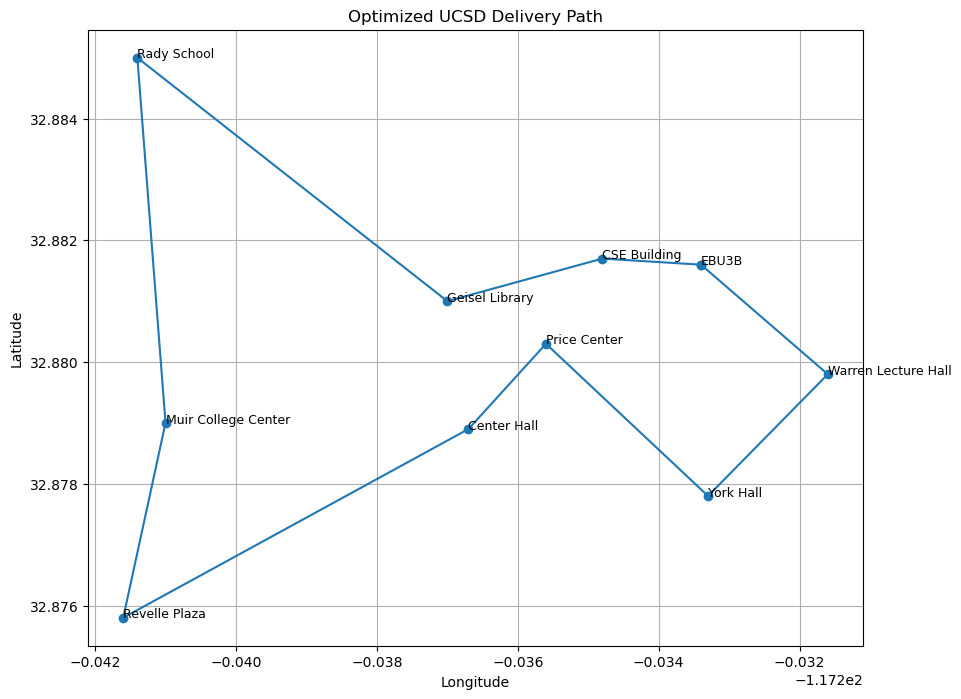

In [21]:
# visualize path
x = [locations[i][1] for i in path] + [locations[path[0]][1]]
y = [locations[i][0] for i in path] + [locations[path[0]][0]]

plt.figure(figsize=(10,8))
plt.plot(x, y, 'o-')

for idx in path:
    name = df.iloc[idx]["name"]
    plt.text(locations[idx][1], locations[idx][0], name, fontsize=9)

plt.title('Optimized UCSD Delivery Path')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
